## Sequential Neural Network - Regression

This is a code along building a Neural Network to predict house sale prices based on various variables using keras and tensorflow.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('../DATA/kc_house_data.csv')

## Exploratory Analysis

First, exploratory analysis is performed to get an overview of the data set.

In [20]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

**Feature Columns**

* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors


In [21]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [22]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


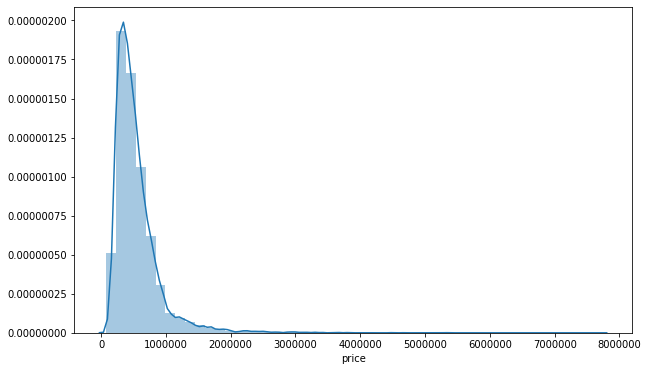

In [23]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'])

Most houses sell for < 1 mio USD with outlayers up to ~ 8 mio USD.

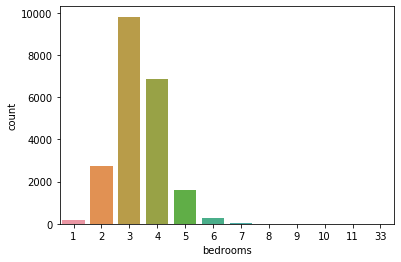

In [24]:
sns.countplot(df['bedrooms'])

Most commonly, houses have 3 bedrooms.

In [25]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

Sale price correlates mostly with the living space (sqft_living).

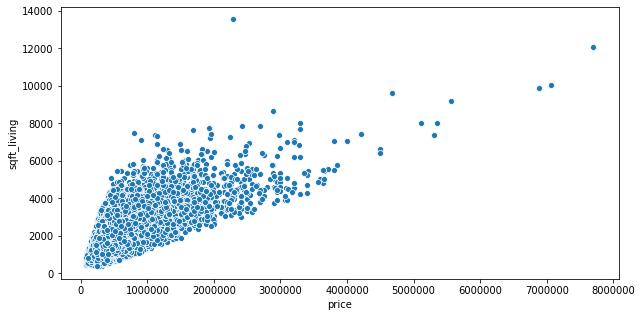

In [26]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='price',y='sqft_living',data=df)

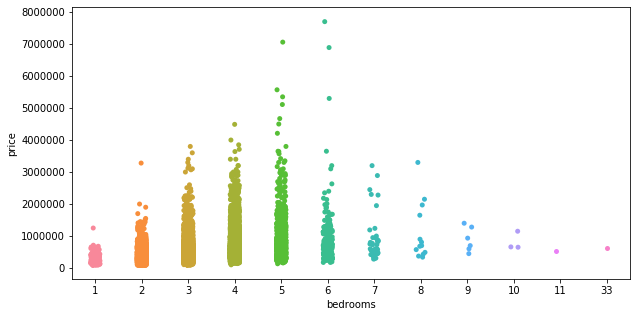

In [27]:
plt.figure(figsize=(10,5))
sns.stripplot(x='bedrooms',y='price', data=df, jitter=True)

There is a high variance of price for houses with the same amount of bedrooms.

We will now briefly analyse price based on location of the sold house by first looking at potential correlation of specific longitudes and latidues. As can be seen, sale price can be particularly high at longitude ~ -122.25 and latidute ~ 47.625.

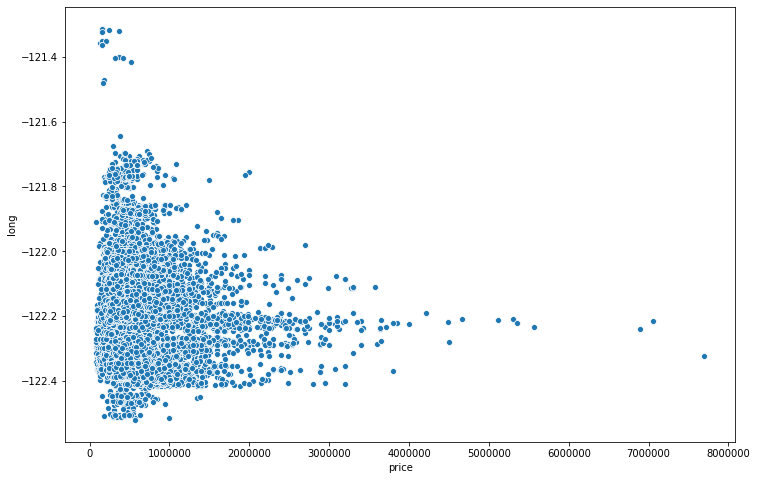

In [28]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

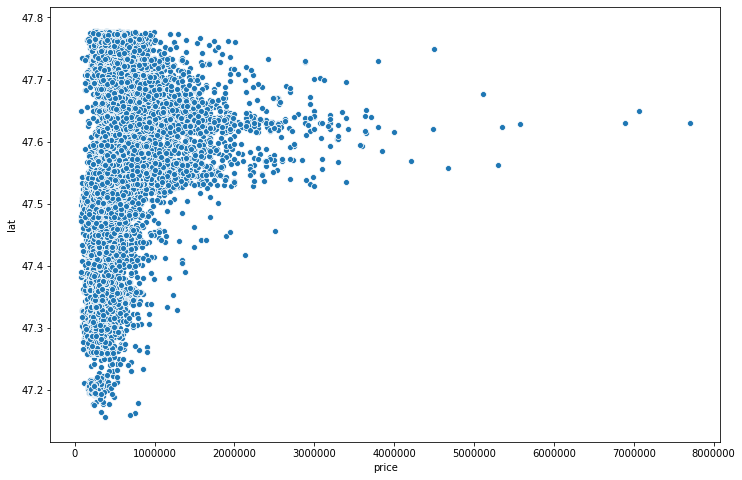

In [29]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)

This finding can be used to create a heatmap using lat and long as y and x coordinates. For a correct color grading, top 1% of housing prices will be excluded.

In [30]:
df.sort_values('price', ascending=False).head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750


In [31]:
len(df)

21597

In [32]:
df_bot_99 = df.sort_values('price', ascending=False).iloc[216:]

The following graph resembles the geography of the analysed houses with a increased price at the aforementioned lat and long.

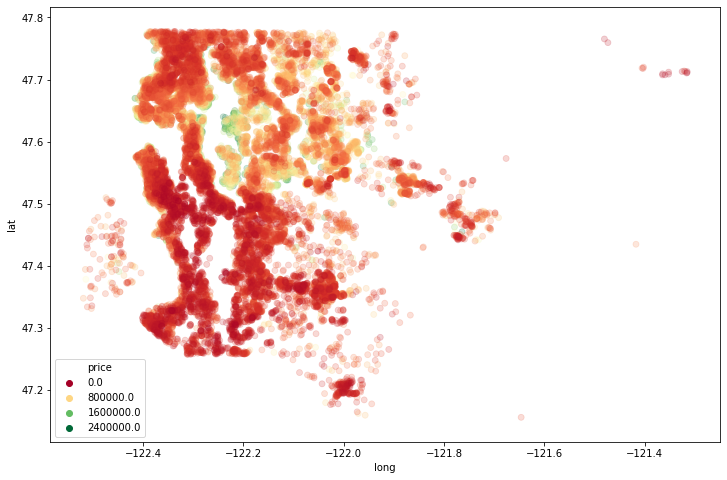

In [33]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df_bot_99,hue='price',edgecolor=None,alpha=0.2,palette='RdYlGn')

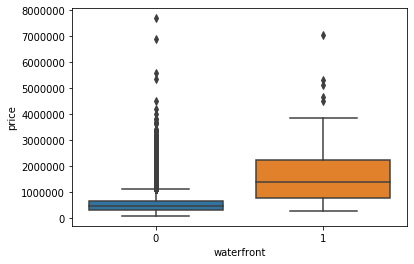

In [34]:
sns.boxplot(x='waterfront',y='price',data=df)

Lastly, waterfront property is more expensive than in land property.

## Feature Engineering

Using these findings, features can be processed / engineered to increase modell accuracy.

In [35]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Date will be used to extract month and year the house is sold, ID amd Zipcode will be dropped as they present to inherent value.

In [36]:
df_clean = df.copy()
df_clean['date'] = pd.to_datetime(df_clean['date'])
df_clean['year'] = df_clean['date'].apply(lambda date: date.year)
df_clean['month'] = df_clean['date'].apply(lambda date: date.month)
df_clean = df_clean.drop(['id','date','zipcode'],axis=1)

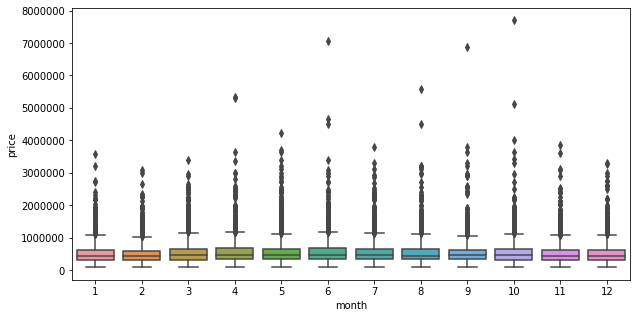

In [37]:
plt.figure(figsize=(10,5))
sns.boxplot(x='month',y='price',data=df_clean)

In [38]:
df_clean.groupby('month').mean()['price'].sort_values(ascending=False)

month
4     562215.615074
6     557534.318182
5     550849.746893
7     544892.161013
3     544057.683200
10    539439.447228
8     536655.212481
9     529723.517787
1     525963.251534
12    524799.902041
11    522359.903478
2     508520.051323
Name: price, dtype: float64

A slight difference in selling price based on month can be found. 

## Data preprocessing and Model creation

Data is split in test and train data and scaled using MinMaxScaler.

In [39]:
X = df_clean.drop('price', axis=1)
y = df_clean['price']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [42]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
X_train.shape

(15117, 19)

In [44]:
X_test.shape

(6480, 19)

Sequential Neural Network Model is created using Tensorflow / Keras.

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [46]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model is fitted to data using batch size of 128 and epoch of 400.

In [47]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 0s 30us/sample - loss: 430229914655.6338 - val_loss: 418854459437.5111
Epoch 2/400
15117/15117 [==============================] - 0s 13us/sample - loss: 428300509874.9307 - val_loss: 412221521879.5457
Epoch 3/400
15117/15117 [==============================] - 0s 11us/sample - loss: 402272361412.7289 - val_loss: 353959707028.5432
Epoch 4/400
15117/15117 [==============================] - 0s 11us/sample - loss: 288678931242.5566 - val_loss: 189798698067.4370
Epoch 5/400
15117/15117 [==============================] - 0s 11us/sample - loss: 134133558192.9494 - val_loss: 97453967719.0321
Epoch 6/400
15117/15117 [==============================] - 0s 11us/sample - loss: 98714703616.3556 - val_loss: 94328002898.8049
Epoch 7/400
15117/15117 [==============================] - 0s 11us/sample - loss: 96572428843.1832 - val_loss: 92632704027.8123
Epoch 8/400
15117/15117 [=====================

First, model is evaluated viewing the loss per epoch. Epochs could be increased as loss is still deacrising at epoch 400.

In [48]:
losses = pd.DataFrame(model.history.history)

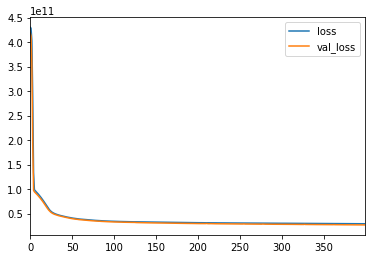

In [49]:
losses.plot()

Second, model is evaluated using MSE, MAE as well as explained variance score.

In [50]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [51]:
predictions = model.predict(X_test)

In [52]:
mean_squared_error(y_test,predictions)

26793069330.2167

In [53]:
mean_absolute_error(y_test,predictions)

101436.55209840374

In [54]:
df_clean['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [55]:
explained_variance_score(y_test,predictions)

0.7979867437186615

**79,5% of variance within the price can be explained using the input variables, which is good first indication but needs improving.**

Below, a new housing price is predicted for demonstration purposes.

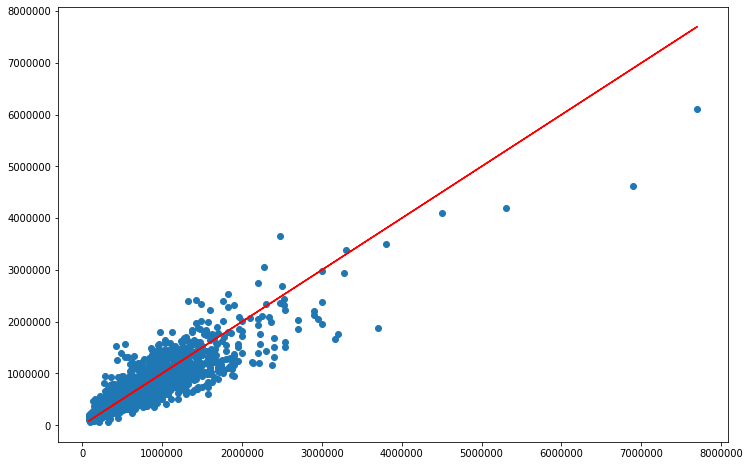

In [56]:
plt.figure(figsize=(12,8))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

In [57]:
new_house = df_clean.drop('price',axis=1).iloc[0]
new_house

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

In [58]:
new_house = scaler.transform(new_house.values.reshape(-1,19))

In [59]:
model.predict(new_house)

array([[287238.53]], dtype=float32)

In [60]:
df.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.0,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
